# Continuous Distributions

## Uniform Distributions

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import datetime


In [6]:
from scipy.stats import uniform

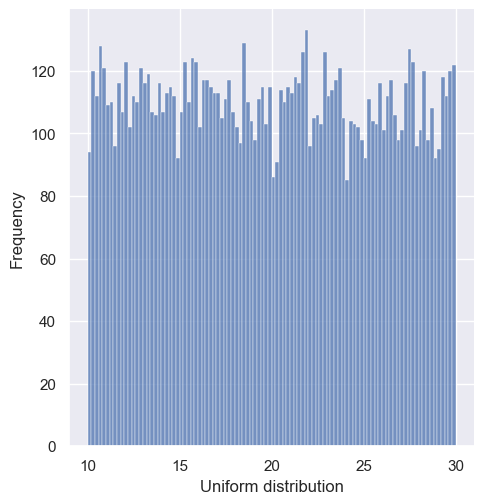

In [51]:
n = 10000
n+=1000

start = 10
width = 20

data_uniform = uniform.rvs(size=n,loc=start,scale=width)
ax = sns.displot(data_uniform,
                 bins=100,
                 kde=False,
                )
ax.set(xlabel="Uniform distribution",ylabel="Frequency")


## Normal Distributions/Gaussian Distribution

In [8]:
from scipy.stats import norm

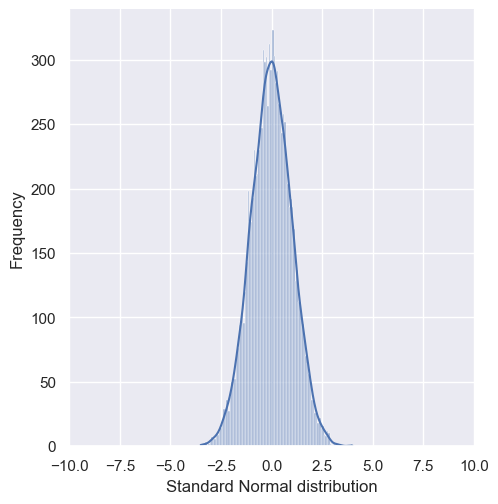

In [52]:
data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                )
plt.xlim(-10,10)
ax.set(xlabel="Standard Normal distribution",ylabel="Frequency")


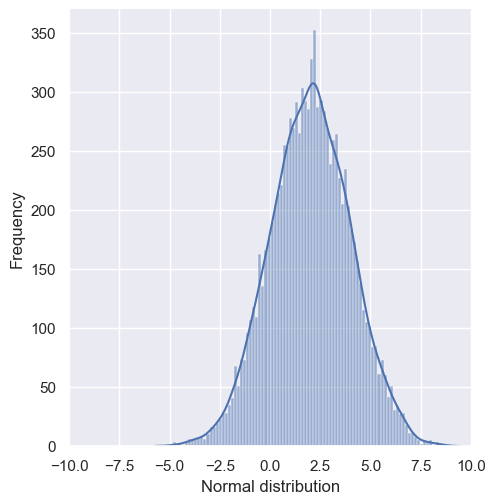

In [54]:
data_normal = norm.rvs(size=10000,loc=2,scale=2)
ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                )
plt.xlim(-10,10)
ax.set(xlabel="Normal distribution",ylabel="Frequency")


## Exponential Distribution

In [55]:
from scipy.stats import expon

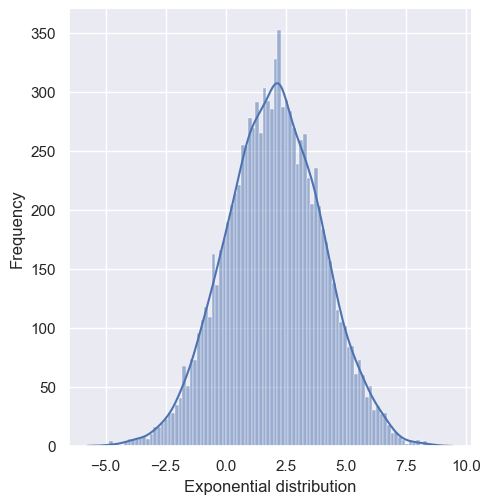

In [57]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                )
#plt.xlim(-10,10)
ax.set(xlabel="Exponential distribution",ylabel="Frequency")


## Beta Distribution

In [58]:
from scipy.stats import beta

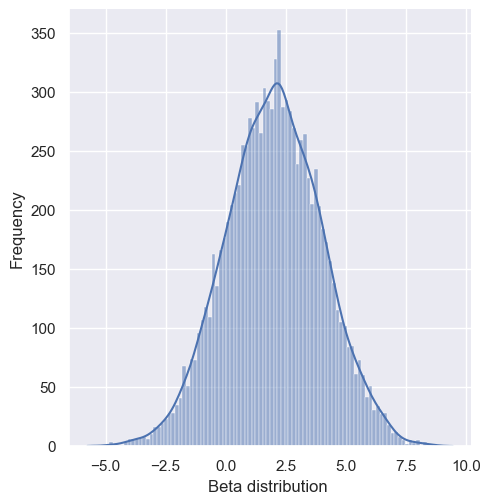

In [59]:
data_beta = beta.rvs(a=5.7,b=1.627,size=1000)
ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                )
#plt.xlim(0,1)
ax.set(xlabel="Beta distribution ",ylabel="Frequency")


# Bayesian Inference and Continuous Distributions

## Sleep Data Analysis

In [60]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize

figsize(16,6)

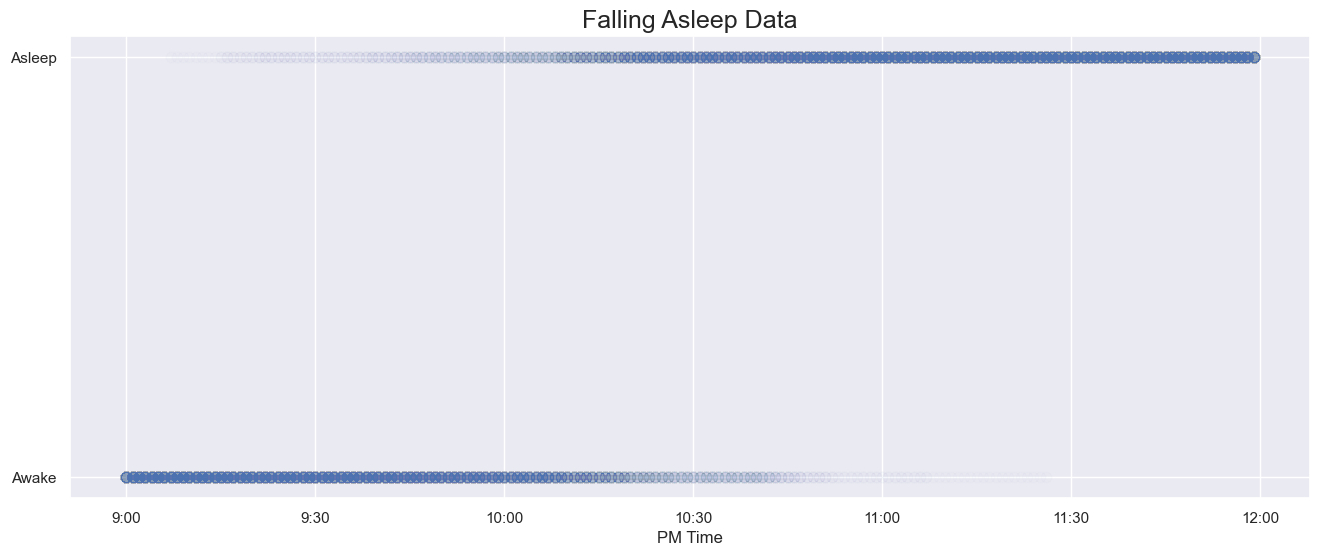

In [25]:
sleep_data = pd.read_csv('sleep_data.csv')

sleep_labels = ['9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00']

plt.scatter(sleep_data['time_offset'],sleep_data['indicator'],
            s=60,alpha=0.01,facecolor='b',edgecolor='b')
plt.yticks([0,1],['Awake', 'Asleep',]);plt.xlabel('PM Time')
plt.title("Falling Asleep Data",size=18)
plt.xticks([-60,-30,0,30,60,90,120],sleep_labels);

In [26]:
sleep_data.head()

,Unnamed: 0,indicator,time_offset
0,2017-12-01 21:00:00,0,-60
1,2017-12-01 21:01:00,0,-59
2,2017-12-01 21:02:00,0,-58
3,2017-12-01 21:03:00,0,-57
4,2017-12-01 21:04:00,0,-56


In [61]:
sleep_data.sort_values('time_offset',inplace=True)

time=np.array(sleep_data.loc[:,'time_offset'])

sleep_obs = np.array(sleep_data.loc[:,'indicator'])

In [62]:
sleep_data.head()

,Unnamed: 0,indicator,time_offset
0,2017-12-01 21:00:00,0,-60
8640,2018-01-18 21:00:00,0,-60
8280,2018-01-16 21:00:00,0,-60
3060,2017-12-18 21:00:00,0,-60
2520,2017-12-15 21:00:00,0,-60


In [29]:
time

array([-60, -60, -60, ..., 119, 119, 119], dtype=int64)

In [64]:
sleep_data.tail()

,Unnamed: 0,indicator,time_offset
1259,2017-12-07 23:59:00,1,119
10079,2018-01-25 23:59:00,1,119
1079,2017-12-06 23:59:00,1,119
899,2017-12-05 23:59:00,1,119
11339,2018-02-01 23:59:00,1,119


In [30]:
sleep_obs

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [31]:
sleep_obs[3260:3275]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
sleep_data.loc[sleep_data['time_offset']==10]

,Unnamed: 0,indicator,time_offset
8170,2018-01-15 22:10:00,1,10
10330,2018-01-27 22:10:00,0,10
4750,2017-12-27 22:10:00,1,10
3130,2017-12-18 22:10:00,0,10
10150,2018-01-26 22:10:00,0,10
...,...,...,...
3670,2017-12-21 22:10:00,0,10
1330,2017-12-08 22:10:00,1,10
2950,2017-12-17 22:10:00,0,10
8350,2018-01-16 22:10:00,1,10


## Calculating Probability at a Particular Time

In [69]:
time_offset = 14

In [70]:
awake_vals = sleep_data.loc[(sleep_data['time_offset']==time_offset)
    & (sleep_data['indicator'] == 0)]

sleep_vals = sleep_data.loc[(sleep_data['time_offset']==time_offset)
    & (sleep_data['indicator'] == 1)] 


In [71]:
print(len(sleep_vals),len(awake_vals))

29 34


In [72]:
p_sleep_at_offset = len(sleep_vals) / (len(sleep_vals) + len(awake_vals))
print(p_sleep_at_offset)

0.4603174603174603


## Calculating the Prior

In [73]:
#Dont have to understand now
# Logistic Parameters from Markov Chain Monte Carlo Notebook - Don't have to understand how got this, for now
alpha = 0.977400
beta = -0.067270

def calculate_prior(time, alpha, beta):
    p = 1.0 / (1.0 + np.exp(np.dot(beta, time) + alpha))
    return p

# Done using some other method here but in essence, it's the same as above. This other method works even if you have little data. 
time_est = np.linspace(time.min()- 5, time.max() + 5, 1000)[:, None]

# Probability at each time using mean values of alpha and beta
sleep_est = calculate_prior(time_est, alpha, beta)

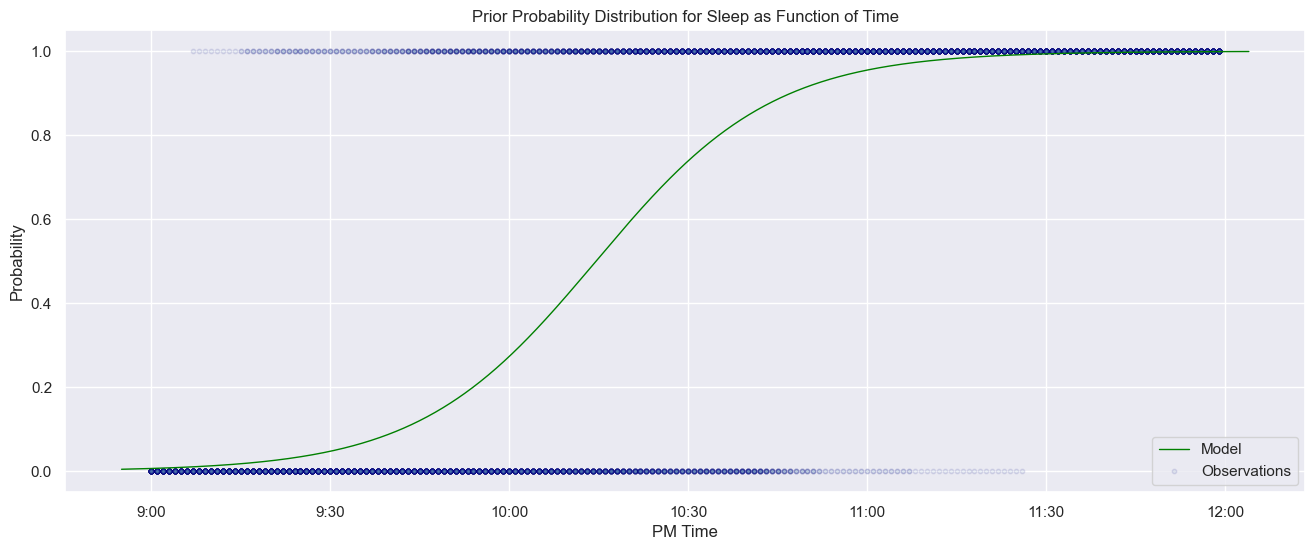

In [40]:
plt.plot(time_est, sleep_est, color = 'green', 
         lw=1, label="Model")
plt.scatter(time, sleep_obs, edgecolor = 'navy',
            s=10, alpha=0.1, label='Observations')
plt.title('Prior Probability Distribution for Sleep as Function of Time');
plt.legend()
plt.ylabel('Probability')
plt.xlabel('PM Time');
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

In [41]:
print('The probability of sleep increases to above 50% at 10:{} PM.\n'.format(
          int(time_est[np.where(sleep_est > 0.5)[0][0]][0])
        )
     )

print('9:30  PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(-30, alpha, beta)))
print('10:00 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(0, alpha, beta)))
print('10:30 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(15, alpha, beta)))

The probability of sleep increases to above 50% at 10:14 PM.

9:30  PM probability of being asleep: 4.76%.
10:00 PM probability of being asleep: 27.34%.
10:30 PM probability of being asleep: 50.79%.


## Bayes Update on Distributions

In [42]:
# likelihoods

# P(light | sleep)
light_sleep = 0.01

# P(-light | sleep)
nolight_sleep = 0.99

# P(light | -sleep)
light_nosleep = 0.8

# P(-light | -sleep)
nolight_nosleep = 0.2

In [43]:
def update_probability(time_offset, light):
    # Calculate the prior for the time
    prior_probability = calculate_prior(time_offset, alpha, beta)
    
    # Account for evidence
    if light == 0:
        likelihood = nolight_sleep
        non_likelihood = nolight_nosleep
    elif light == 1:
        likelihood = light_sleep
        non_likelihood = light_nosleep
        
    # rewrite in terms of Bayes rule
    numerator = likelihood * prior_probability
    denominator = (likelihood * prior_probability) + (non_likelihood * (1 - prior_probability))
    
    conditional_probability = numerator / denominator
    
    
    if type(time_offset) == int:
        time = datetime.datetime(2017, 1, 1, 10, 0, 0)
        new_time = str((time + datetime. timedelta(minutes = time_offset)).time())
                       
        print('Time: {} PM \nLight is {}.'.format(new_time, "ON" if light == 1 else "OFF"))
    
        print('The prior probability of sleep:    {:.2f}%'.format(100 * prior_probability))
        print('The updated probability of sleep:  {:.2f}%'.format(100 * conditional_probability))
    
    return conditional_probability

In [44]:
result = update_probability(time_offset = 30, light = 1)

Time: 10:30:00 PM 
Light is ON.
The prior probability of sleep:    73.90%
The updated probability of sleep:  3.42%


In [45]:
result = update_probability(time_offset = 30, light = 0)

Time: 10:30:00 PM 
Light is OFF.
The prior probability of sleep:    73.90%
The updated probability of sleep:  93.34%


In [46]:
result = update_probability(time_offset = -30, light = 0)

Time: 09:30:00 PM 
Light is OFF.
The prior probability of sleep:    4.76%
The updated probability of sleep:  19.84%


## Updating All Priors Independently

In [47]:
light_on_prob = update_probability(time_est, light = 1)
light_off_prob = update_probability(time_est, light = 0)

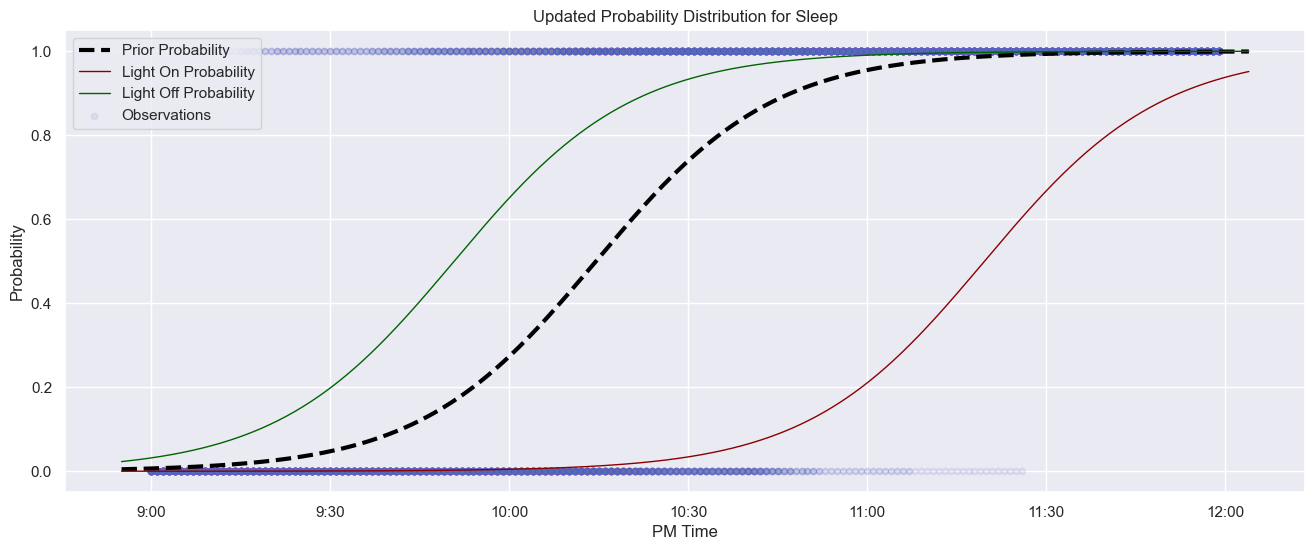

In [48]:
plt.plot(time_est, sleep_est, color = 'black', 
         lw=3, linestyle = '--', label="Prior Probability")
plt.plot(time_est, light_on_prob, color = 'darkred',
          lw = 1, label = 'Light On Probability')
plt.plot(time_est, light_off_prob, color = 'darkgreen',
           lw = 1, label = 'Light Off Probability')
plt.scatter(time, sleep_obs, edgecolor = 'slateblue',
            s=20, alpha=0.1, label='Observations')
plt.title('Updated Probability Distribution for Sleep');
plt.legend(loc=2)
plt.ylabel('Probability')
plt.xlabel('PM Time');
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);